`Sales Prediction Using Python`



In [1]:
# Import Libraries
import numpy as np
import pandas as pd

# Importing  tools for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import preprocessing libraries
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# Import Model
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

# Import evaluation metric libraries
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Import tree for visualization
from sklearn import tree

### Dataset Loading

In [2]:
# Load Dataset
df = pd.read_csv(r'Advertising.csv')

In [3]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


#### Duplicate Values

In [5]:
df.duplicated().sum()

0

#### Missing Values/Null Values

In [6]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [7]:
# Dataset Columns
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [8]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.00,200.00,200.00,200.00,200.00
mean,100.50,147.04,23.26,30.55,14.02
std,57.88,85.85,14.85,21.78,5.22
min,1.00,0.70,0.00,0.30,1.60
25%,50.75,74.38,9.98,12.75,10.38
50%,100.50,149.75,22.90,25.75,12.90
75%,150.25,218.82,36.52,45.10,17.40
max,200.00,296.40,49.60,114.00,27.00


In [9]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in Unnamed: 0 is 200
No. of unique values in TV is 190
No. of unique values in Radio is 167
No. of unique values in Newspaper is 172
No. of unique values in Sales is 121


In [10]:
# Removing the 'Unnamed: 0' column 
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [11]:
# New updated DataFrame
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [12]:
# Defining dependent variable
dependent_variable = ['Sales']

`Data Visualization`

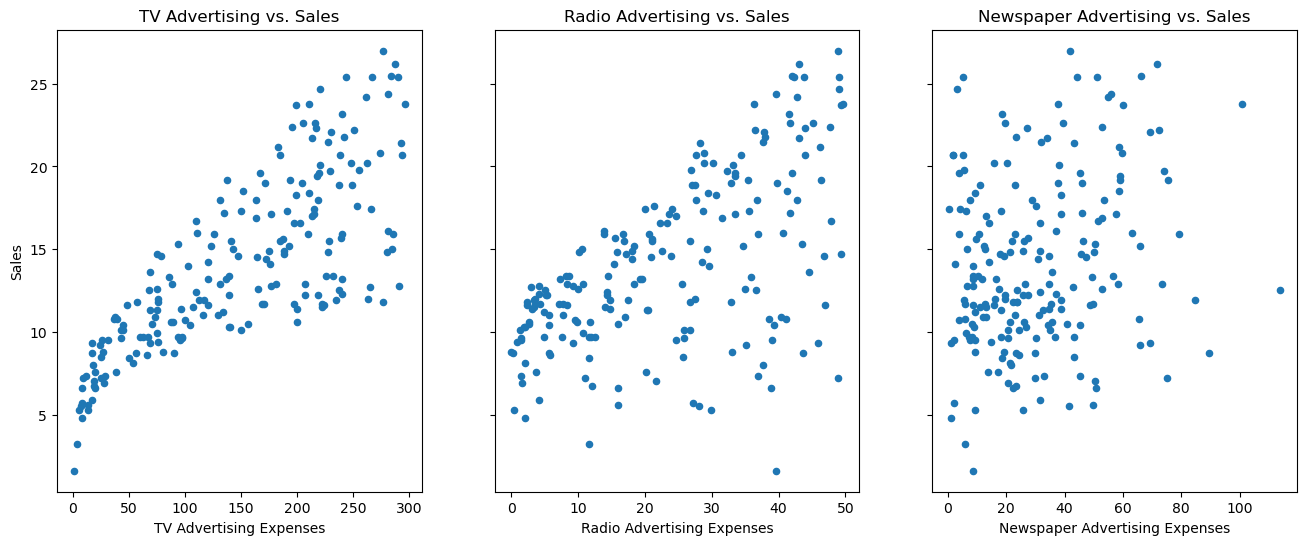

In [13]:
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(16, 6))

# Scatter plot for TV advertising expenses vs. Sales
df.plot(kind="scatter", x='TV', y='Sales', ax=axs[0])
axs[0].set_title('TV Advertising vs. Sales')
axs[0].set_xlabel('TV Advertising Expenses')
axs[0].set_ylabel('Sales')

# Scatter plot for Radio advertising expenses vs. Sales
df.plot(kind="scatter", x='Radio', y='Sales', ax=axs[1])
axs[1].set_title('Radio Advertising vs. Sales')
axs[1].set_xlabel('Radio Advertising Expenses')
axs[1].set_ylabel('Sales')

# Scatter plot for Newspaper advertising expenses vs. Sales
df.plot(kind="scatter", x='Newspaper', y='Sales', ax=axs[2])
axs[2].set_title('Newspaper Advertising vs. Sales')
axs[2].set_xlabel('Newspaper Advertising Expenses')
axs[2].set_ylabel('Sales')

plt.show()

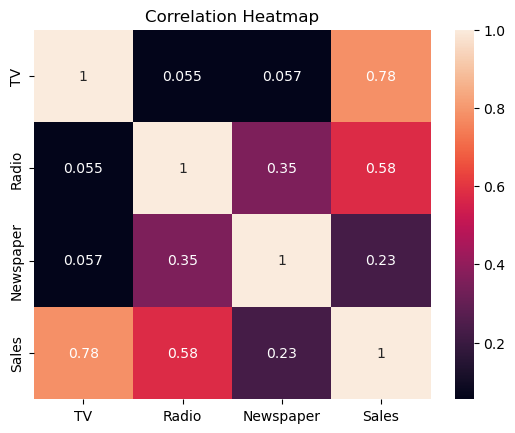

In [16]:
# Heatmap visualization
sns.heatmap(df.corr(), annot=True)

plt.title("Correlation Heatmap")

plt.show()

C:\Users\KD\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


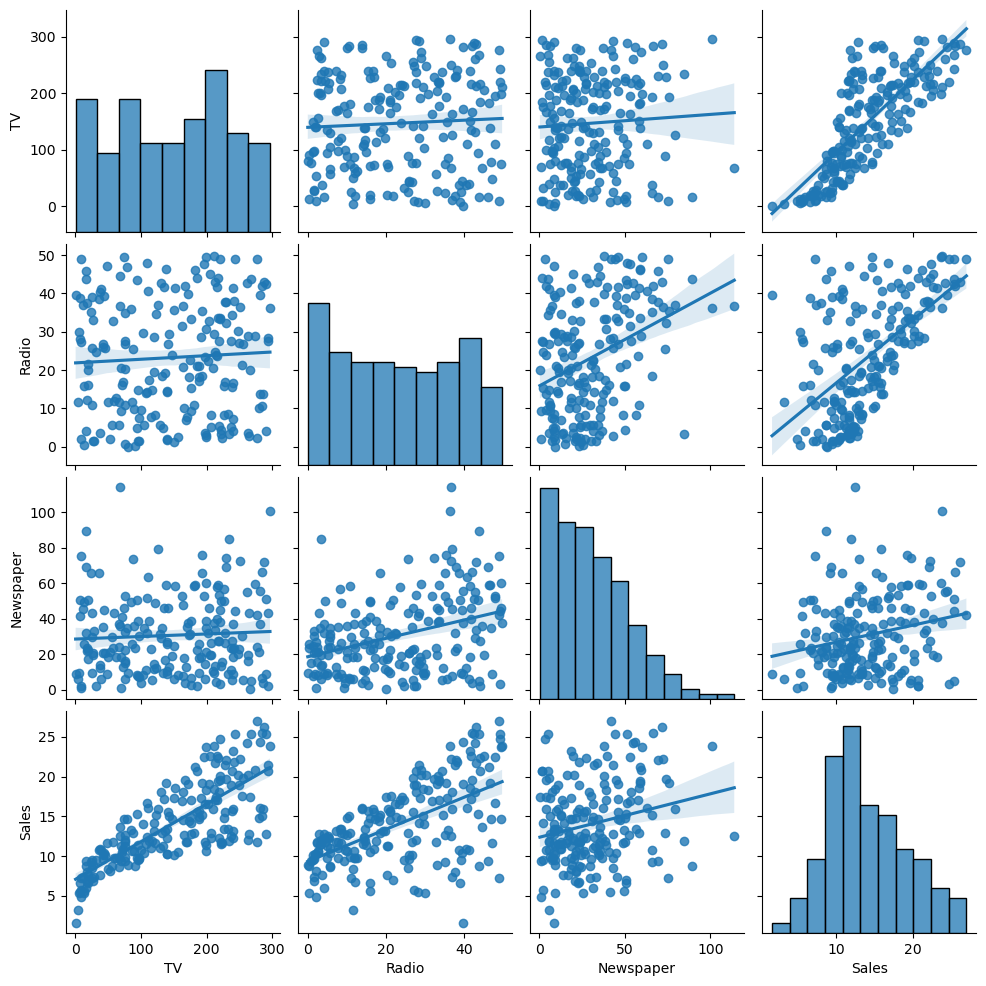

In [17]:
# Pair plot visualization 
sns.pairplot(df,kind="reg");

plt.show()

`Feature Engineering & Data Pre-processing`

In [18]:
# Removing the outlier from newspaper
df=df[df['Newspaper']<=90]

In [19]:
# Select the features wisely to avoid overfitting
features = [i for i in df.columns if i not in ['Sales']]
features

['TV', 'Radio', 'Newspaper']

In [20]:
continuous_variables = ['TV', 'Radio', 'Newspaper']

In [21]:
continuous_feature_df = pd.DataFrame(df[continuous_variables])

In [22]:
continuous_feature_df

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [24]:
# Final data for modeling
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


C:\Users\KD\AppData\Local\Temp\ipykernel_3616\1433510748.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[dependent_variable])


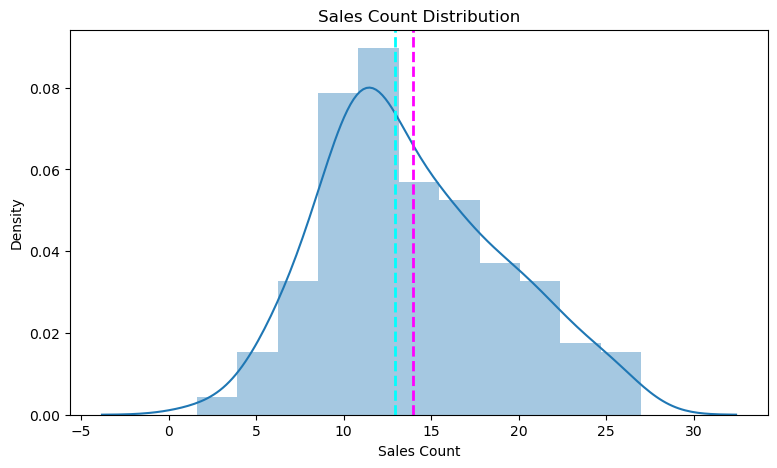

In [25]:
# Transform the data
plt.figure(figsize=(9,5))
sns.distplot(df[dependent_variable])
plt.xlabel('Sales Count')
plt.title('Sales Count Distribution')
plt.axvline(df[dependent_variable[0]].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df[dependent_variable[0]].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

In [26]:
# Skew of the dependent variable
df[dependent_variable].skew()

Sales    0.40713
dtype: float64

In [27]:
# Defining dependent and independent variables
X = df.drop('Sales',axis=1)
y = df[dependent_variable]

In [28]:
features

['TV', 'Radio', 'Newspaper']

In [29]:
features = [i for i in df.columns if i not in ['Sales']]

In [30]:
# Scaling your data
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

In [31]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
# Checking the train distribution of dependent variable
y_train.value_counts()

Sales
9.7      4
15.9     3
20.7     3
12.2     3
11.8     3
        ..
12.4     1
12.3     1
11.2     1
10.9     1
27.0     1
Name: count, Length: 109, dtype: int64

In [33]:
# Defining a function to print evaluation matrix
def evaluate_model(model, y_test, y_pred):

  mse = mean_squared_error(y_test,y_pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_test,y_pred)
  y_train_pred = model.predict(X_train) 
  r2_train = r2_score(y_train, y_train_pred)
  r2 = r2_score(y_test,y_pred)
  r2_adjusted = 1-(1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))

  print("MSE :" , mse)
  print("RMSE :" ,rmse)
  print("MAE :" ,mae)
  print("Train R2 :" ,r2_train)
  print("Test R2 :" ,r2)
  print("Adjusted R2 : ", r2_adjusted)

  plt.figure(figsize=(12,4))
  plt.plot((y_pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Sales', fontsize=12)

  model_score = [mse,rmse,mae,r2_train,r2,r2_adjusted]
  return model_score

In [34]:
# Create a score dataframe
score = pd.DataFrame(index = ['MSE', 'RMSE', 'MAE', 'Train R2', 'Test R2', 'Adjusted R2'])

`Linear Regression`

In [35]:
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predict on the model
y_pred_li = reg.predict(X_test)

MSE : 2.432076682469541
RMSE : 1.5595116807736775
MAE : 1.177152628314206
Train R2 : 0.8898322019518987
Test R2 : 0.9098946359000558
Adjusted R2 :  0.9023858555583938


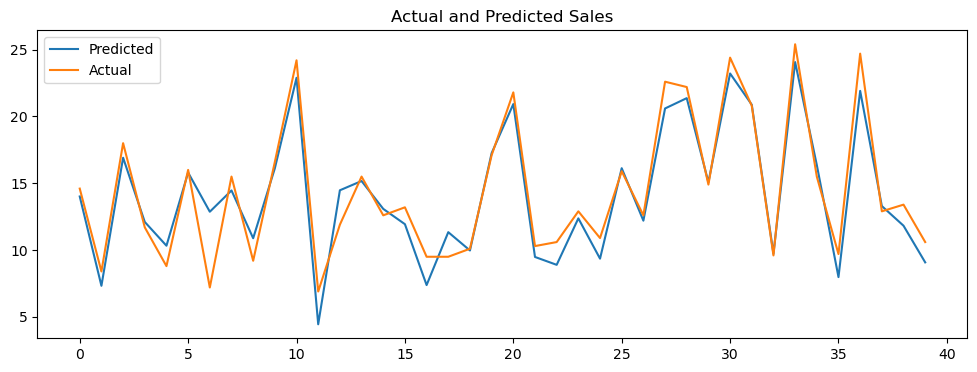

In [36]:
# Visualizing evaluation Metric Score chart
linear_score = evaluate_model(reg, y_test,y_pred_li)
score['Linear regression'] = linear_score

`Cross- Validation & Hyperparameter Tuning`

In [37]:
reg = LinearRegression()
param_grid = {'fit_intercept': [True, False]}

# Perform grid search
grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             return_train_score=True, scoring='r2')

In [38]:
# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best R2 score: ", grid_search.best_score_)

Best parameters:  {'fit_intercept': True}
Best R2 score:  0.8794637215026521


In [39]:
# Use the best parameter to train the model
best_reg = grid_search.best_estimator_
best_reg.fit(X_train, y_train)

LinearRegression()

In [40]:
# Predict on test data
y_pred_li2 = best_reg.predict(X_test)

MSE : 2.432076682469541
RMSE : 1.5595116807736775
MAE : 1.177152628314206
Train R2 : 0.8898322019518987
Test R2 : 0.9098946359000558
Adjusted R2 :  0.9023858555583938


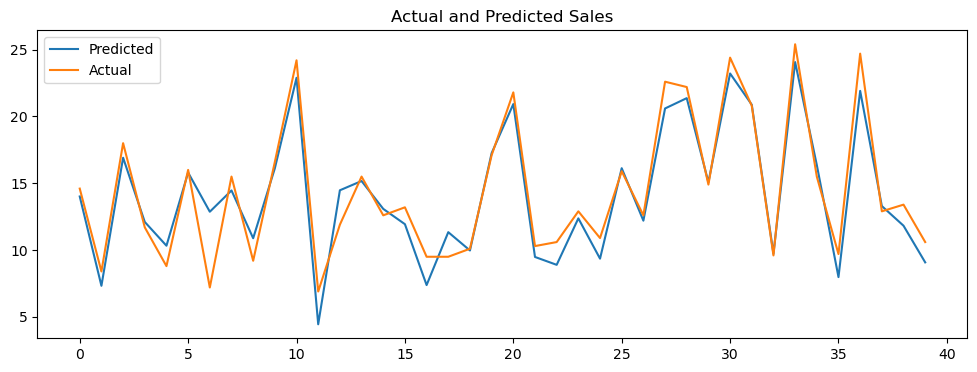

In [45]:
# Visualizing evaluation Metric Score chart
linear_score2 = evaluate_model(best_reg, y_test,y_pred_li2)

`Lasso Regression`

In [41]:
lasso = Lasso()
lasso.fit(X_train, y_train)

# Predict on the model
y_pred_lasso1 = lasso.predict(X_test)

MSE : 4.412196366645486
RMSE : 2.1005228793434947
MAE : 1.5005797781784491
Train R2 : 0.8182193987500639
Test R2 : 0.8365337067853652
Adjusted R2 :  0.8229115156841457


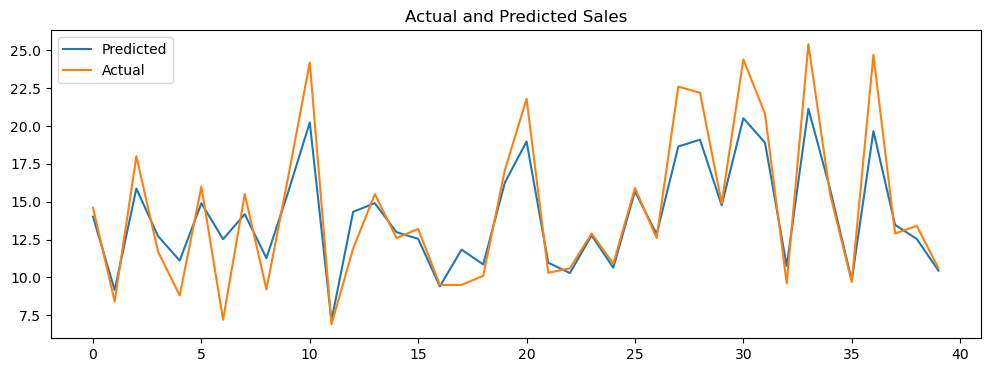

In [42]:
# Visualizing evaluation Metric Score chart
lasso_score = evaluate_model(lasso, y_test,y_pred_lasso1)
score['Lasso regression'] = lasso_score

In [43]:
# Define the model
lasso = Lasso()

# Define the parameters to be optimized & Perform grid search
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

# Fitting model
lasso_regressor.fit(X_train,y_train)

C:\Users\KD\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.118e+00, tolerance: 3.445e-01
  model = cd_fast.enet_coordinate_descent(


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [44]:
# Getting optimum parameters
print("The optimum alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The optimum alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -3.2038025925545


In [45]:
lasso = Lasso(alpha = lasso_regressor.best_params_['alpha'])

lasso.fit(X_train, y_train)

# Predict the model
y_pred_lassocv = lasso.predict(X_test)

MSE : 2.4238565146909345
RMSE : 1.5568739559421418
MAE : 1.1755801408509008
Train R2 : 0.8898231407789969
Test R2 : 0.9101991827163601
Adjusted R2 :  0.9027157812760568


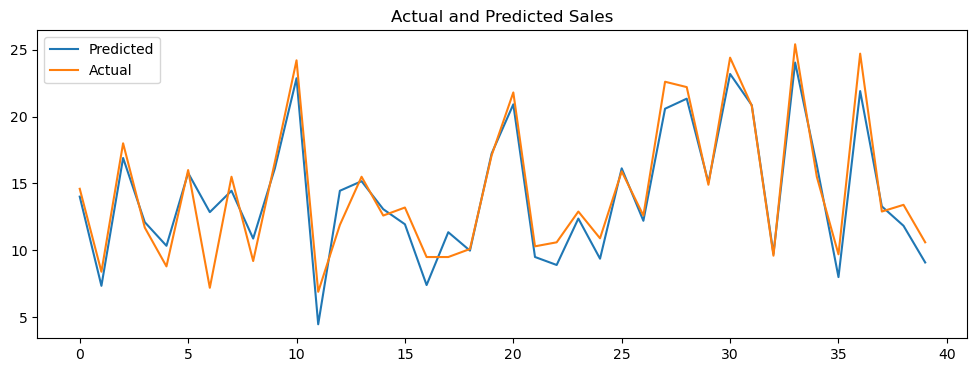

In [46]:
#Evaluation matrices for Lasso regression
lasso2 = evaluate_model(lasso, y_test,y_pred_lassocv)

name = 'Lasso with alpha = ' + str(lasso_regressor.best_params_['alpha'])

score[name] = lasso2

In [47]:
ridge = Ridge()
ridge.fit(X_train, y_train)

# Predict on the model
y_pred_ridge1 = ridge.predict(X_test)

MSE : 2.4480478265087067
RMSE : 1.5646238610313683
MAE : 1.1805419939164685
Train R2 : 0.8897995235722359
Test R2 : 0.9093029252195848
Adjusted R2 :  0.9017448356545502


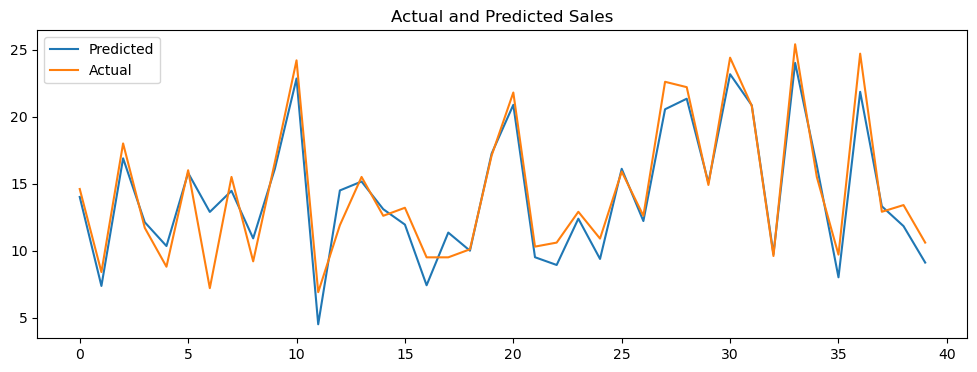

In [48]:
result = evaluate_model(ridge, y_test,y_pred_ridge1)
score['Ridge'] = result

In [49]:
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

# Fitting model
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [50]:
# Getting optimum parameters
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -3.2105087592751778


In [52]:
# Initiate ridge with best alpha
ridge = Ridge(alpha = ridge_regressor.best_params_['alpha'])

# Fit the ridge regression model to your training data
ridge.fit(X_train, y_train)

# Predict on model
y_pred_ridge = ridge.predict(X_test)

MSE : 2.4480478265087067
RMSE : 1.5646238610313683
MAE : 1.1805419939164685
Train R2 : 0.8897995235722359
Test R2 : 0.9093029252195848
Adjusted R2 :  0.9017448356545502


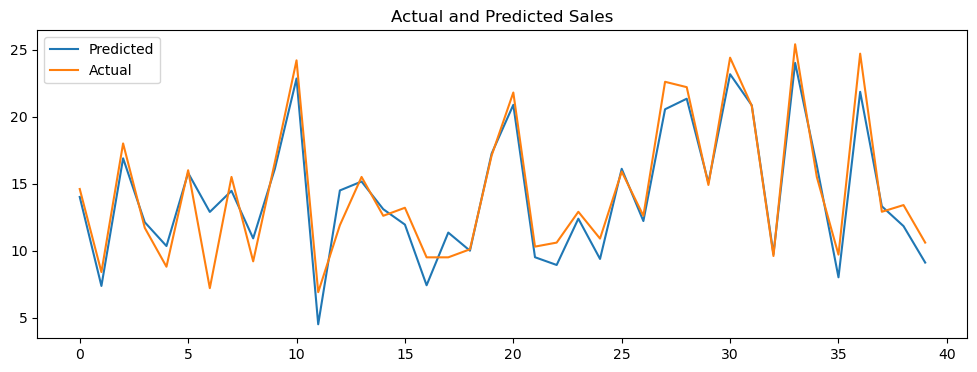

In [53]:
result = evaluate_model(ridge, y_test,y_pred_ridge)

namer = 'Ridge with alpha = ' + str(ridge_regressor.best_params_['alpha'])

score[namer] = result

In [54]:
# Import Decision Tree Regressor 
dt = DecisionTreeRegressor(random_state=1)
dt.fit(X_train,y_train)

# Predict on the model
y_pred_dt1 = dt.predict(X_test)

MSE : 1.3222499999999997
RMSE : 1.1498912992104948
MAE : 0.9125
Train R2 : 1.0
Test R2 : 0.9510123103683663
Adjusted R2 :  0.9469300028990635


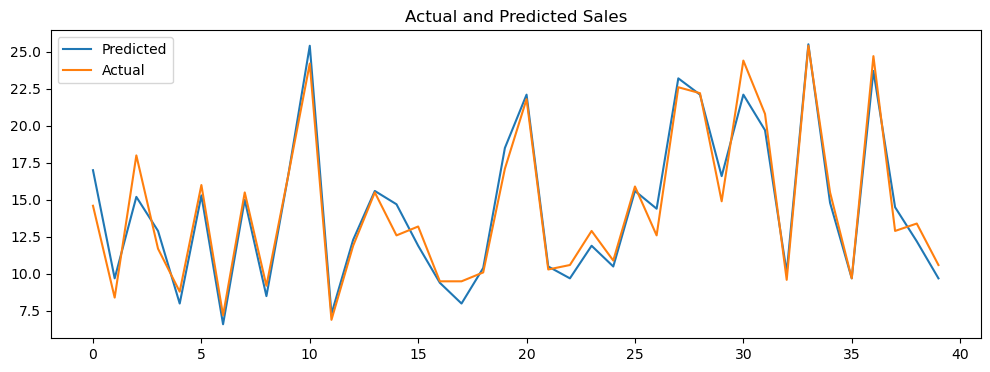

In [55]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(dt, y_test,y_pred_dt1)
score['Decision tree'] = result

In [56]:
# Import Random Forest Regressor class
rf = RandomForestRegressor(random_state=0)

# Fit the Random Forest model to your training data
rf.fit(X_train,y_train)

# Predict on the model
y_pred_rf1 = rf.predict(X_test)

C:\Users\KD\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MSE : 0.5587373749999969
RMSE : 0.747487374475313
MAE : 0.6071249999999965
Train R2 : 0.9969560499583574
Test R2 : 0.9792994871528882
Adjusted R2 :  0.9775744444156289


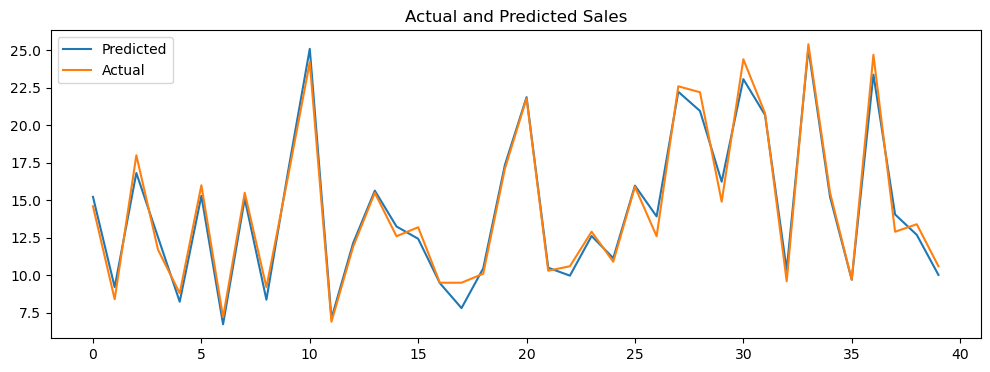

In [57]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(rf, y_test,y_pred_rf1)
score['Random forest'] = result

In [58]:
# Random forest model
rf_model = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':[300],                    # limited due to computational power availability
             'min_samples_leaf':np.arange(20,25)}     # Approximate range from a decision tree model

In [59]:
# Fitting a Random Forest model with best parameters obtained from gridsearch
rf_gridsearch = GridSearchCV(rf_model,rf_params,cv=6,scoring='neg_root_mean_squared_error')
rf_gridsearch.fit(X_train,y_train)
rf_best_params = rf_gridsearch.best_params_

C:\Users\KD\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\KD\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\KD\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\KD\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

In [60]:
# Best parameters for random forests
rf_best_params

{'min_samples_leaf': 20, 'n_estimators': 300}

In [61]:
# Building Random Forest model with best parameters
rf_model = RandomForestRegressor(n_estimators=rf_best_params['n_estimators'],
                                 min_samples_leaf=rf_best_params['min_samples_leaf'],
                                 random_state=0)

In [62]:
# Fitting model
rf_model.fit(X_train,y_train)

C:\Users\KD\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(min_samples_leaf=20, n_estimators=300, random_state=0)

In [63]:
# Predict on the model
y_pred_rf = rf_model.predict(X_test)

MSE : 4.290102078955843
RMSE : 2.071256159666361
MAE : 1.6948545471585574
Train R2 : 0.8424349168186637
Test R2 : 0.8410571456744826
Adjusted R2 :  0.8278119078140229


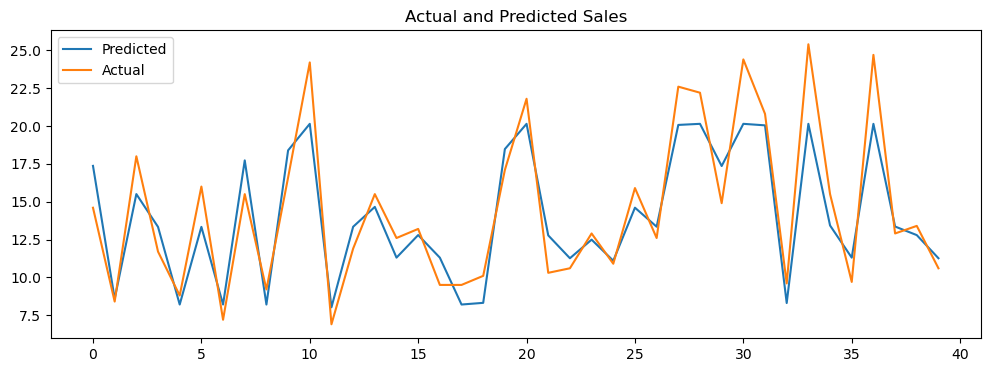

In [64]:
# Evaluation matrices for RandomForest
result = evaluate_model(rf_model, y_test,y_pred_rf)
score['Random forest tuned'] = result